## Siawash Code for project 3

In [43]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
sqlite_conn = sqlite3.connect('climate_impact_agriculture.db')

third_climate_df = pd.read_sql_query("SELECT * FROM climate_impact_agriculture;", sqlite_conn)

sqlite_conn.close()

third_climate_df.head()

,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,Irrigation_Access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [45]:
third_climate_df.columns

Index(['year', 'country', 'region', 'crop_type', 'average_temperature_c',
       'total_precipitation_mm', 'co2_emissions_mt', 'crop_yield_mt_per_ha',
       'extreme_weather_events', 'Irrigation_Access_%',
       'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha',
       'soil_health_index', 'adaptation_strategies',
       'economic_impact_million_usd'],
      dtype='object')

In [46]:
#Check for null values

third_climate_df.isnull().sum()

year                           0
country                        0
region                         0
crop_type                      0
average_temperature_c          0
total_precipitation_mm         0
co2_emissions_mt               0
crop_yield_mt_per_ha           0
extreme_weather_events         0
Irrigation_Access_%            0
pesticide_use_kg_per_ha        0
fertilizer_use_kg_per_ha       0
soil_health_index              0
adaptation_strategies          0
economic_impact_million_usd    0
dtype: int64

In [47]:
adaptation_strategies = third_climate_df['adaptation_strategies'].unique()
adaptation_strategies

array(['Water Management', 'Crop Rotation', 'No Adaptation',
       'Organic Farming', 'Drought-resistant Crops'], dtype=object)

In [48]:
continuous_vars = ['average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt', 'crop_yield_mt_per_ha',
       'extreme_weather_events', 'Irrigation_Access_%', 'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha',
       'soil_health_index', 'economic_impact_million_usd']

In [49]:
categorical_var = ['year', 'country', 'region', 'crop_type', ]

In [50]:
print(third_climate_df[continuous_vars].dtypes)

average_temperature_c          float64
total_precipitation_mm         float64
co2_emissions_mt               float64
crop_yield_mt_per_ha           float64
extreme_weather_events           int64
Irrigation_Access_%            float64
pesticide_use_kg_per_ha        float64
fertilizer_use_kg_per_ha       float64
soil_health_index              float64
economic_impact_million_usd    float64
dtype: object


In [51]:
#Group data by year and get statisical values for continuous variables
# .T transposes the data

third_climate_df.groupby(['year'])[continuous_vars].agg(['mean', 'std', 'min', 'max']).T

year                                     1990         1991         1992  \
average_temperature_c       mean    15.555680    14.803312    15.083139   
                            std     10.827006    12.088235    11.793138   
                            min     -4.680000    -4.830000    -4.920000   
                            max     34.780000    35.000000    34.730000   
total_precipitation_mm      mean  1606.037440  1594.774299  1602.640839   
                            std    812.254390   812.829239   802.969734   
                            min    210.110000   200.170000   200.150000   
                            max   2983.570000  2998.720000  2991.250000   
co2_emissions_mt            mean    14.898240    15.400287    14.898504   
                            std      8.609671     9.006993     8.779782   
                            min      0.540000     0.570000     0.530000   
                            max     29.930000    29.980000    29.930000   
crop_yield_mt_per_ha        mean     2.230624     2.216175     2.161310   
                            std      0.998128     0.975447     1.005555   
                            min      0.477000     0.477000     0.540000   
                            max      4.710000     4.820000     4.610000   
extreme_weather_events      mean     5.132000     4.805732     5.193431   
                            std      3.303062     3.160837     3.226918   
                            min      0.000000     0.000000     0.000000   
                            max     10.000000    10.000000    10.000000   
Irrigation_Access_%         mean    56.050520    54.429650    59.022774   
                            std     24.176646    25.569055    25.919938   
                            min     10.040000    10.390000    10.060000   
                            max     99.740000    98.920000    99.950000   
pesticide_use_kg_per_ha     mean    24.219760    24.695191    25.435803   
                            std     14.999524    14.371105    15.000893   
                            min      0.200000     0.040000     0.040000   
                            max     49.680000    49.940000    49.780000   
fertilizer_use_kg_per_ha    mean    49.013400    51.779459    49.041715   
                            std     30.845435    28.765425    29.190109   
                            min      0.390000     0.650000     0.010000   
                            max     99.650000    99.730000    99.230000   
soil_health_index           mean    66.132920    62.952548    64.419672   
                            std     19.830588    19.697178    20.717110   
                            min     31.220000    30.270000    30.230000   
                            max     99.920000    99.770000    99.990000   
economic_impact_million_usd mean   689.755360   657.752070   656.655401   
                            std    429.898790   387.961064   414.867575   
                            min    113.130000    66.170000    88.830000   
                            max   2270.280000  2160.310000  2130.320000   

year                                     1993         1994         1995  \
average_temperature_c       mean    15.672296    16.174098    14.972202   
                            std     11.336352    12.070130    11.460148   
                            min     -4.830000    -4.980000    -4.930000   
                            max     34.990000    34.980000    34.930000   
total_precipitation_mm      mean  1674.992646  1552.384262  1611.994007   
                            std    815.337222   802.345866   817.002109   
                            min    202.450000   209.950000   200.460000   
                            max   2999.670000  2993.870000  2991.450000   
co2_emissions_mt            mean    15.020078    15.874361    15.882094   
                            std      8.612359     8.941387     8.491950   
                            min      0.590000     0.770000     0.660000   
                        

## Relationship between average temperature and crop yield 

In [52]:
#Step 1 Aggregate mean values of continuous variables over time. Focus on avg temp and crop yield

mean_data_avgTemp_cropYield = third_climate_df.groupby('year').mean(numeric_only=True)[['average_temperature_c', 'crop_yield_mt_per_ha']]
mean_data_avgTemp_cropYield

,average_temperature_c,crop_yield_mt_per_ha
year,,
1990,15.555680,2.230624
1991,14.803312,2.216175
1992,15.083139,2.161310
1993,15.672296,2.277397
1994,16.174098,2.137331
1995,14.972202,2.194639
1996,14.048000,2.204939
1997,15.993589,2.275345
1998,15.779331,2.286967


In [53]:
#Calculate Pearson correlation coefficient on mean_data_avgTemp_cropYield

correlation, p_value = stats.pearsonr(mean_data_avgTemp_cropYield['average_temperature_c'], mean_data_avgTemp_cropYield['crop_yield_mt_per_ha'])

# Print the result
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.2115763144479478
P-value: 0.22242149603227424


In [54]:
#Calculate Spearman correlation coefficient

spearman_corr, spearman_p_value = stats.spearmanr(mean_data_avgTemp_cropYield['average_temperature_c'], mean_data_avgTemp_cropYield['crop_yield_mt_per_ha'])
print(f'Spearman correlation coefficient: {spearman_corr}')
print(f'Spearman P-value: {spearman_p_value}')

Spearman correlation coefficient: 0.18375350140056024
Spearman P-value: 0.29067128676550474


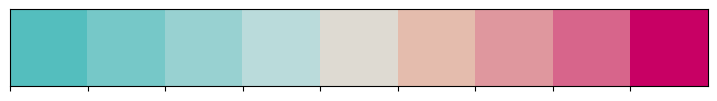

In [55]:
# define custom color palette
# The actual colors can be seen in the palette below.

custom_colors = [
    "#54bebe",
    "#76c8c8",
    "#98d1d1",
    "#badbdb",
    "#dedad2",
    "#e4bcad",
    "#df979e",
    "#d7658b",
    "#c80064"
]

sns_palette = sns.color_palette(custom_colors)
sns.palplot(sns_palette)

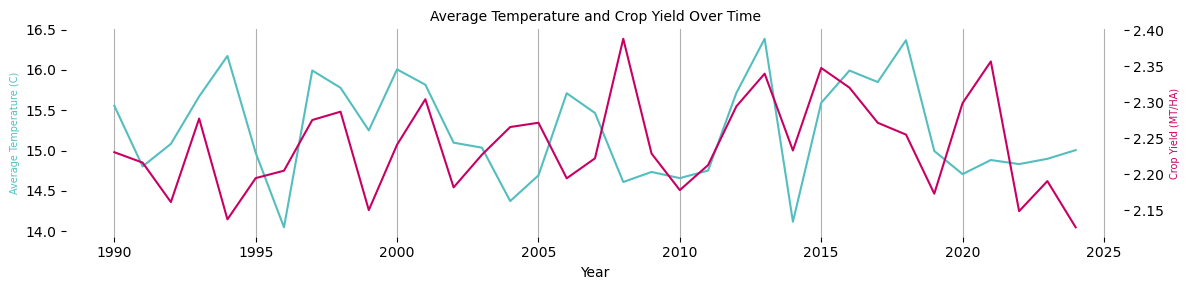

In [56]:
# Step 2i) Visualization for Trends Over Time

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(12, 3))

# Plot the Average Temperature
ax1.plot(mean_data_avgTemp_cropYield.index, mean_data_avgTemp_cropYield['average_temperature_c'], color=custom_colors[0], label='Average Temperature (C)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (C)', color=custom_colors[0], fontsize = 7)
ax1.grid(True, axis = 'x')

# Create a second y-axis for Crop Yield
ax2 = ax1.twinx()
ax2.plot(mean_data_avgTemp_cropYield.index, mean_data_avgTemp_cropYield['crop_yield_mt_per_ha'], color=custom_colors[-1], label='Crop Yield (MT/HA)')
ax2.set_ylabel('Crop Yield (MT/HA)', color=custom_colors[-1], fontsize = 7)

# Disable x and y spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Add title and grid
plt.title('Average Temperature and Crop Yield Over Time', fontsize = 10)
fig.tight_layout()

# Show the plot
plt.show()

In [57]:
#Step 2 iii) Visualization for a 5 year moving/rolling average
mean_data_avgTemp_cropYield = mean_data_avgTemp_cropYield.sort_index()
#mean_data_avgTemp_cropYield = mean_data_avgTemp_cropYield.sort_index()
movingAvg_avgTemp_cropYield = mean_data_avgTemp_cropYield.rolling(window=5).mean()
movingAvg_avgTemp_cropYield


,average_temperature_c,crop_yield_mt_per_ha
year,,
1990,NaN,NaN
1991,NaN,NaN
1992,NaN,NaN
1993,NaN,NaN
1994,15.457705,2.204567
1995,15.341009,2.197370
1996,15.189947,2.195123
1997,15.372037,2.217930
1998,15.393444,2.219844


In [58]:
#Calculate Pearson correlation coefficient
#calculating Pearson correlation coefficient on movingAvg_avgTemp_cropYield gave error - need to remove NaN's before calculating

cleand_movingAvg_data = movingAvg_avgTemp_cropYield[['average_temperature_c', 'crop_yield_mt_per_ha']].dropna()
correlation, p_value = stats.pearsonr(cleand_movingAvg_data['average_temperature_c'], cleand_movingAvg_data['crop_yield_mt_per_ha'])

# Print the result
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.24616329344798593
P-value: 0.1819072691189926


In [59]:
#Calculate Spearman correlation coefficient

spearman_corr, spearman_p_value = stats.spearmanr(cleand_movingAvg_data['average_temperature_c'], cleand_movingAvg_data['crop_yield_mt_per_ha'])
print(f'Spearman correlation coefficient: {spearman_corr}')
print(f'Spearman P-value: {spearman_p_value}')

Spearman correlation coefficient: 0.1745967741935484
Spearman P-value: 0.3475210954433021


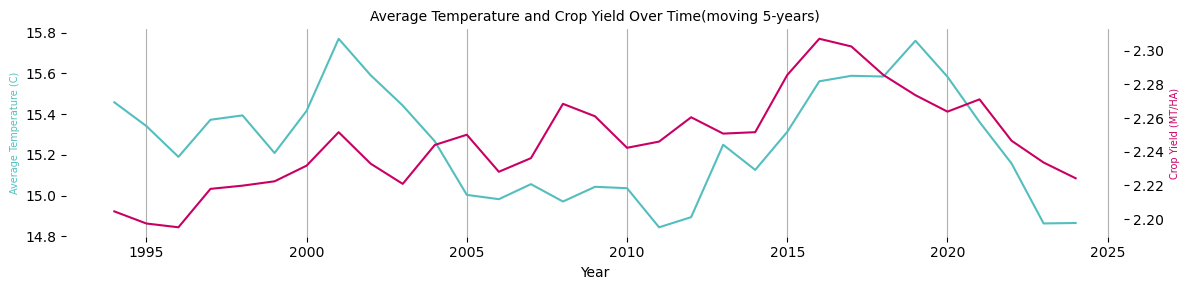

In [60]:
# Create a subplot and set figure size
fig, ax1 = plt.subplots(figsize=(12, 3))

# Plot the Average Temperature
ax1.plot(movingAvg_avgTemp_cropYield.index, movingAvg_avgTemp_cropYield['average_temperature_c'], color=custom_colors[0], label='Average_Temperature_C(moving5y)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (C)', color=custom_colors[0], fontsize = 7)
ax1.grid(True, axis = 'x')

# Create a second y-axis for Crop Yield
ax2 = ax1.twinx()
ax2.plot(movingAvg_avgTemp_cropYield.index, movingAvg_avgTemp_cropYield['crop_yield_mt_per_ha'], color=custom_colors[-1], label='Crop_Yield_MT_per_HA(moving 5y)')
ax2.set_ylabel('Crop Yield (MT/HA)', color=custom_colors[-1], fontsize = 7)


# Disable x and y spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Add title and grid
plt.title('Average Temperature and Crop Yield Over Time(moving 5-years)', fontsize = 10)
fig.tight_layout()

# Show the plot
plt.show()


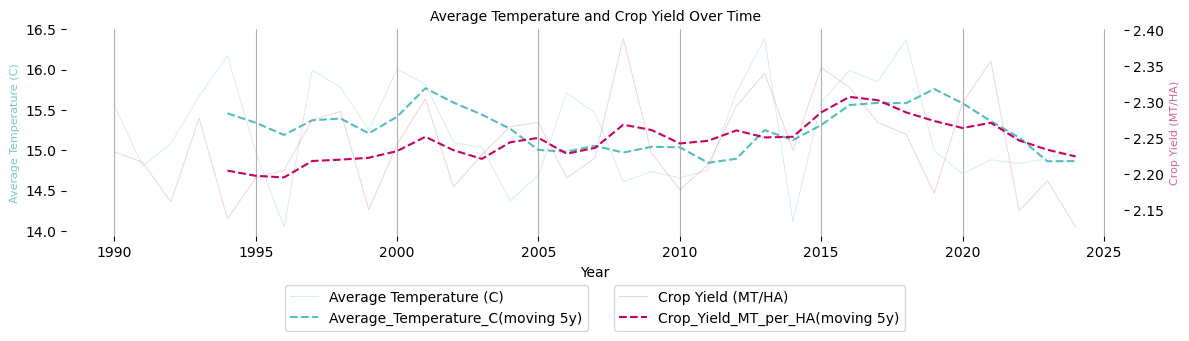

In [61]:
#Overlap of Avg temp and crop yield, and moving 5y avg temp and crop yield 

movingAvg_avgTemp_cropYield = mean_data_avgTemp_cropYield.rolling(window = 5).mean()

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(12, 3))

# Plot the Average Temperature
ax1.plot(mean_data_avgTemp_cropYield.index, mean_data_avgTemp_cropYield['average_temperature_c'], color=custom_colors[1], label='Average Temperature (C)',
         lw = 0.7, alpha = 0.3)
ax1.plot(movingAvg_avgTemp_cropYield.index, movingAvg_avgTemp_cropYield['average_temperature_c'], color=custom_colors[0], label='Average_Temperature_C(moving 5y)',
         lw = 1.5, ls = '--')
ax1.set_xlabel('Year', fontsize = 10)
ax1.set_ylabel('Average Temperature (C)', color=custom_colors[1], fontsize = 8)
ax1.grid(True, axis = 'x')

# Create a second y-axis for Crop Yield
ax2 = ax1.twinx()
ax2.plot(mean_data_avgTemp_cropYield.index, mean_data_avgTemp_cropYield['crop_yield_mt_per_ha'], color=custom_colors[-2], label='Crop Yield (MT/HA)',
         lw = 0.7, alpha = 0.3)
ax2.plot(movingAvg_avgTemp_cropYield.index, movingAvg_avgTemp_cropYield['crop_yield_mt_per_ha'], color=custom_colors[-1], label='Crop_Yield_MT_per_HA(moving 5y)',
         lw = 1.5, ls = '--')
ax2.set_ylabel('Crop Yield (MT/HA)', color=custom_colors[-2], fontsize = 8)

# Disable x and y spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Add title and grid
plt.title('Average Temperature and Crop Yield Over Time', fontsize = 10)
fig.tight_layout()

# Add legends outside the plot for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, bbox_to_anchor=(0.5, -0.2))
ax2.legend(lines2, labels2, bbox_to_anchor=(0.8, -0.2))

# Show the plot
plt.show()

## Economic impact of Crop Type on Country

In [62]:
impact = third_climate_df.pivot_table(index= 'country', 
                                      columns= 'crop_type',
                                      values= 'economic_impact_million_usd',
                                      aggfunc= 'mean')



<Axes: xlabel='crop_type', ylabel='country'>

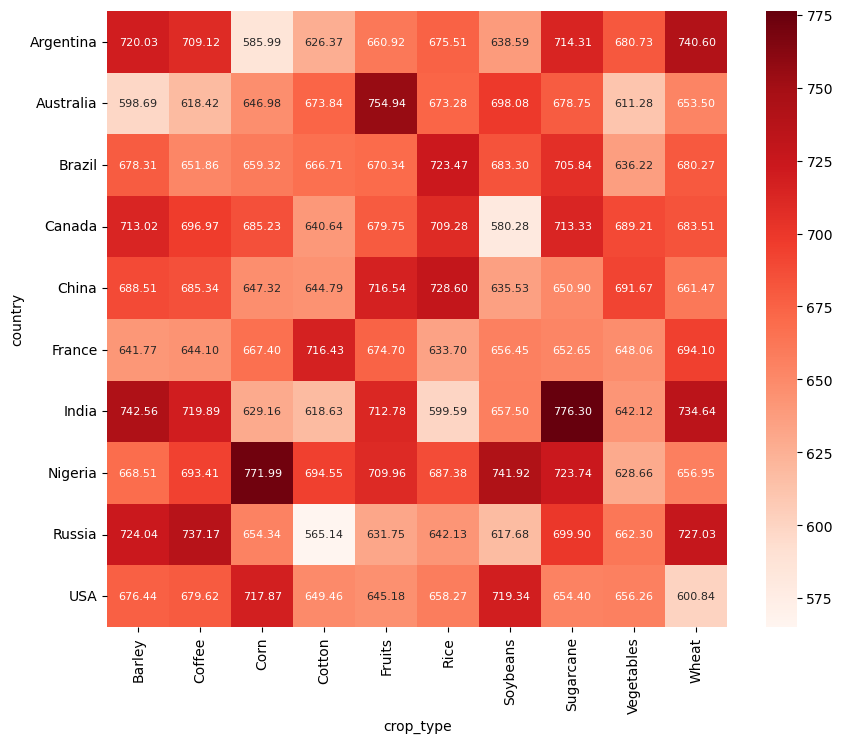

In [63]:
plt.figure(figsize= (10, 8))
sns.heatmap(data= impact, cmap= 'Reds',
            annot= True, fmt='.2f',
            annot_kws= {'size':8})

## Investigation of Extreme Weather Events and Economic Impact on a Country

In [64]:
#correlation analysis between extreme weather events and economic impact by country and region

corr_country_region = third_climate_df.groupby(['country', 'region']).apply(lambda group: group['extreme_weather_events'].corr(group['economic_impact_million_usd'])).reset_index(name='Correlation')

/var/folders/ld/9d4kd_s57gb7pmyzfqtc9lqm0000gn/T/ipykernel_5880/978148486.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_country_region = third_climate_df.groupby(['country', 'region']).apply(lambda group: group['extreme_weather_events'].corr(group['economic_impact_million_usd'])).reset_index(name='Correlation')


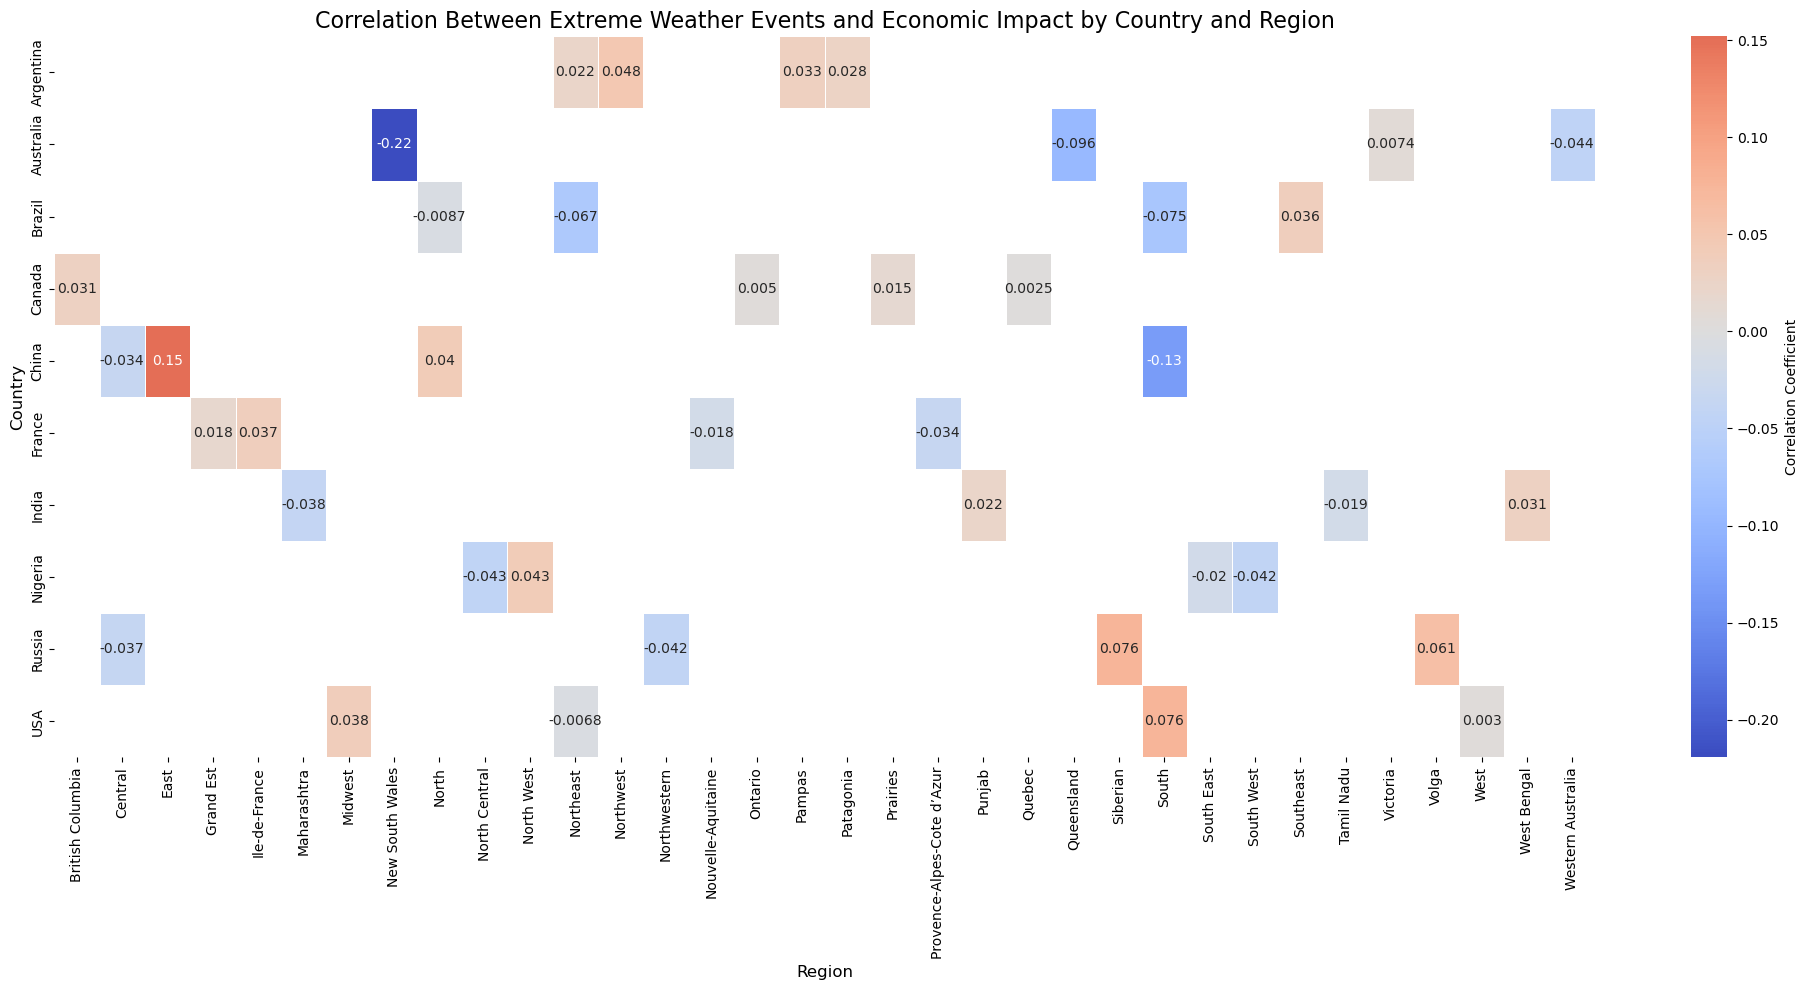

In [65]:
#create pivot table, country as rows and regios as columns

pivot_corr_country_region = corr_country_region.pivot(index="country", columns="region", values="Correlation")

plt.figure(figsize=(20,10))

sns.heatmap(pivot_corr_country_region, annot=True, cmap='coolwarm', center=0, linewidths= .5, cbar_kws={'label':'Correlation Coefficient'})

# Add title and labels
plt.title('Correlation Between Extreme Weather Events and Economic Impact by Country and Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


## Multiple linear regression

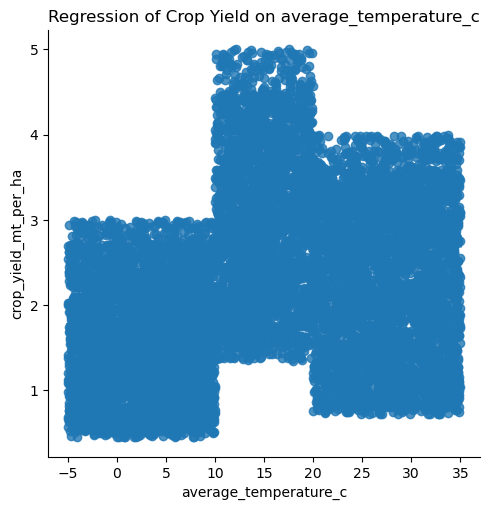

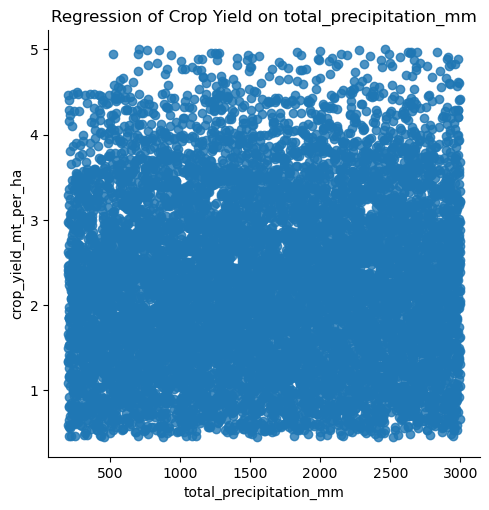

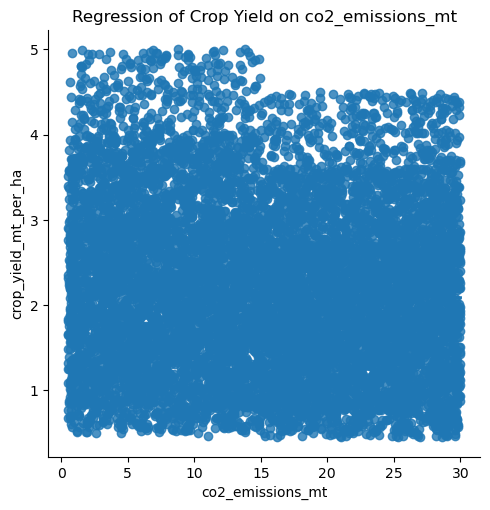

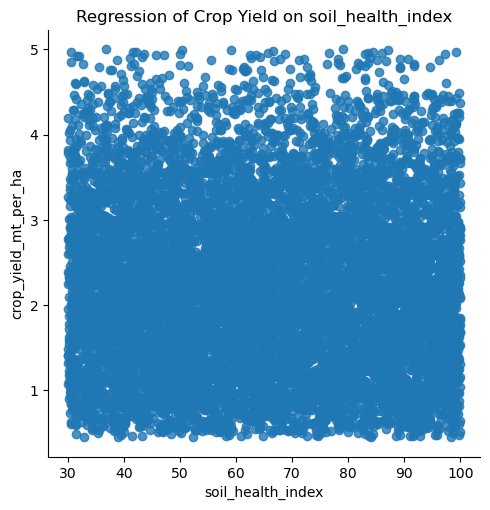

In [66]:
# Scatter plots with regression lines
for predictor in ['average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt', 'soil_health_index']:
    sns.lmplot(x=predictor, y='crop_yield_mt_per_ha', data=third_climate_df, ci=None)
    plt.title(f'Regression of Crop Yield on {predictor}')
    plt.show()

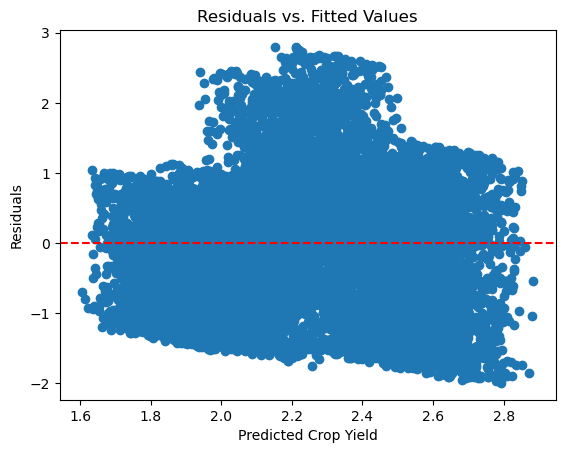

In [67]:
# Define the model formula
model_formula = 'crop_yield_mt_per_ha ~ average_temperature_c + total_precipitation_mm + co2_emissions_mt + soil_health_index'

model = ols(model_formula, data=third_climate_df).fit()

# Plot residuals
predicted = model.fittedvalues
residuals = model.resid

plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Crop Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

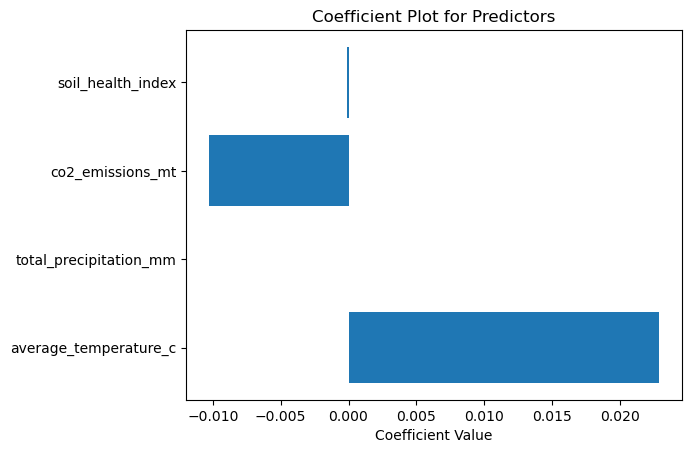

In [68]:
# Coefficient plot
coefficients = model.params[1:]  # Exclude intercept
predictors = ['average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt', 'soil_health_index']

plt.barh(predictors, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Coefficient Plot for Predictors')
plt.show()

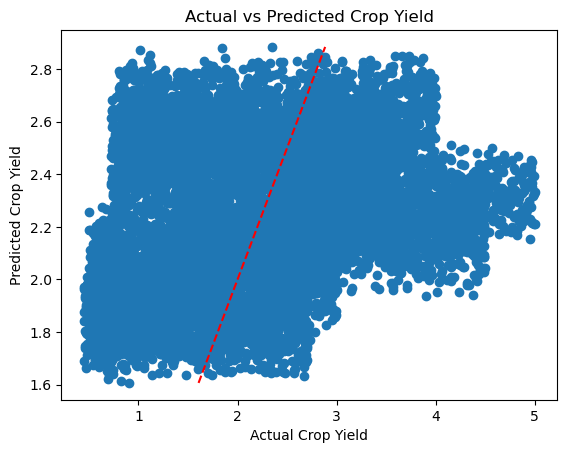

In [69]:
# Actual vs Predicted plot
plt.scatter(third_climate_df['crop_yield_mt_per_ha'], predicted)
plt.plot([min(predicted), max(predicted)], [min(predicted), max(predicted)], color='red', linestyle='--')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.show()

In [70]:
#Multiple Linear Regression

# Print the summary of the regression model
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     crop_yield_mt_per_ha   R-squared:                       0.078
Model:                              OLS   Adj. R-squared:                  0.078
Method:                   Least Squares   F-statistic:                     212.1
Date:                  Wed, 16 Oct 2024   Prob (F-statistic):          5.65e-175
Time:                          19:41:57   Log-Likelihood:                -13765.
No. Observations:                 10000   AIC:                         2.754e+04
Df Residuals:                      9995   BIC:                         2.758e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

## Plotly Code

In [71]:
import plotly.graph_objects as go

In [72]:
# Calculate the moving average (5-year window)
movingAvg_avgTemp_cropYield = mean_data_avgTemp_cropYield.rolling(window=5).mean()

# Create traces for Average Temperature
fig2 = go.Figure()

# Plot Average Temperature
fig2.add_trace(go.Scatter(
    x=mean_data_avgTemp_cropYield.index,
    y=mean_data_avgTemp_cropYield['average_temperature_c'],
    mode='lines',
    name='Average Temperature (C)',
    line=dict(color='blue', width=0.7),
    opacity=0.3
))

# Plot Moving Average of Average Temperature
fig2.add_trace(go.Scatter(
    x=movingAvg_avgTemp_cropYield.index,
    y=movingAvg_avgTemp_cropYield['average_temperature_c'],
    mode='lines',
    name='Average Temperature (C, moving 5y)',
    line=dict(color='darkblue', width=1.5, dash='dash')
))

# Plot Crop Yield on a secondary y-axis
fig2.add_trace(go.Scatter(
    x=mean_data_avgTemp_cropYield.index,
    y=mean_data_avgTemp_cropYield['crop_yield_mt_per_ha'],
    mode='lines',
    name='Crop Yield (MT/HA)',
    line=dict(color='green', width=0.7),
    opacity=0.3,
    yaxis='y2'
))

# Plot Moving Average of Crop Yield
fig2.add_trace(go.Scatter(
    x=movingAvg_avgTemp_cropYield.index,
    y=movingAvg_avgTemp_cropYield['crop_yield_mt_per_ha'],
    mode='lines',
    name='Crop Yield (MT/HA, moving 5y)',
    line=dict(color='darkgreen', width=1.5, dash='dash'),
    yaxis='y2'
))

# Update layout for dual y-axes
fig2.update_layout(
    title='Average Temperature and Crop Yield Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(
        title='Average Temperature (C)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Crop Yield (MT/HA)',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.5, y=-0.2, xanchor='center', yanchor='top'),
    margin=dict(l=50, r=50, t=50, b=50),
    hovermode='x',
    plot_bgcolor='white'
)

# Add gridlines and remove spines (axes borders)
fig2.update_xaxes(showgrid=True, gridcolor='lightgray')
fig2.update_yaxes(showgrid=True, gridcolor='lightgray')
fig2.update_yaxes(showline=False)  # Disable spines

# Show the plot
fig2.show()